## Evaluate NCES

In [59]:
import json
from collections import Counter
import seaborn as sns
sns.set_theme(style="whitegrid")

Here, we take a closer look into the performance of each architecture. In particular, we consider learning problems where at least one architecture synthesizes a solution with an F-measure less than 10%

In [60]:
def get_diverse_predictions(kb):
    with open(f'datasets/{kb}/Results/NCES.json') as file:
        results = json.load(file)
    Results = [kb]
    top_performance = Counter()
    for i in range(len(results['GRU']['f1']['values'])):
        if min([results[key]['f1']['values'][i] for key in results]) < 10:
            preds = [(key, results[key]['prediction']['values'][i], results[key]['f1']['values'][i]) for key in results]
            preds_ = sorted(preds,key = lambda x: -x[-1])
            Results.append(preds)
            top_performance[preds_[0][0]] += 1
            if min([results[key]['f1']['values'][i] for key in results]) == 0:
                print("Drastic difference: ", preds_)
    print('\n\nTop performance: ', top_performance)
    return Results, top_performance

In [61]:
Res1, top1 = get_diverse_predictions('carcinogenesis')

Drastic difference:  [('SetTransformer', 'Di23 ⊔ Nitrogen-38', 100.0), ('LSTM', 'Di23 ⊔ Sulfur-77', 30.587999999999997), ('GRU', 'Di48 ⊔ Ketone', 0.0)]
Drastic difference:  [('SetTransformer', 'Barium ⊔ Manganese-85', 100.0), ('GRU', 'Barium ⊔ Manganese-85', 100.0), ('LSTM', 'Calcium-84 ⊔ Chlorine-93', 0.0)]
Drastic difference:  [('GRU', 'Nitrogen ⊔ Nitrogen', 98.00999999999999), ('SetTransformer', 'Nitrogen ⊔ Nitrogen ⊔ Nitrogen ⊔ Di48', 96.806), ('LSTM', '(Oxygen ⊔ Oxygen-53) ⊓ (∀ hasBond.Di48)', 0.0)]
Drastic difference:  [('SetTransformer', 'Imine ⊔ Oxygen-41', 100.0), ('GRU', 'Imine ⊔ Oxygen-52', 77.273), ('LSTM', 'Di232 ⊔ Ring_size_4', 0.0)]
Drastic difference:  [('GRU', 'Arsenic-101 ⊔ Di67a', 100.0), ('SetTransformer', 'Arsenic-101 ⊔ Di8', 16.667), ('LSTM', 'Di260 ⊔ Di8', 0.0)]
Drastic difference:  [('SetTransformer', 'Zinc-87 ⊔ Oxygen ⊔ Oxygen-52', 99.59), ('GRU', 'Oxygen ⊔ Oxygen', 99.522), ('LSTM', 'Oxygen ⊓ Sulfur-70', 0.0)]
Drastic difference:  [('SetTransformer', 'Carbon-1

In [62]:
Res2, top2 = get_diverse_predictions('mutagenesis')

Drastic difference:  [('LSTM', '¬Sulfur-72', 99.98899999999999), ('GRU', '¬Carbon-194', 99.97200000000001), ('SetTransformer', 'Bromine-94', 0.0)]
Drastic difference:  [('LSTM', 'Carbon-25 ⊔ (∃ inBond.Nitrogen-38)', 99.843), ('SetTransformer', 'Carbon-25', 0.0), ('GRU', 'Carbon-25 ⊔ Nitrogen-38 ⊔ Nitrogen-38 ⊔ Nitrogen-38', 0.0)]
Drastic difference:  [('LSTM', 'Fluorine-92 ⊔ Fluorine', 100.0), ('GRU', 'Fluorine-92 ⊔ Nitrogen-35', 78.947), ('SetTransformer', '¬Fluorine-92', 0.0)]
Drastic difference:  [('SetTransformer', 'Phenanthrene ⊔ (∃ hasAtom.Carbon-195)', 100.0), ('LSTM', 'Carbon_6_ring ⊔ (∃ hasAtom.Carbon-195)', 31.933), ('GRU', 'Bond-5 ⊔ (∃ hasAtom.Carbon-28)', 0.0)]
Drastic difference:  [('SetTransformer', 'Carbon-194 ⊔ Hydrogen-8', 100.0), ('GRU', 'Carbon-194 ⊔ Nitrogen-35', 30.0), ('LSTM', 'Carbon-230 ⊔ Oxygen-45', 0.0)]
Drastic difference:  [('GRU', 'Bond-1 ⊔ Oxygen-49', 88.488), ('LSTM', 'Ball3 ⊔ Bond-2', 33.031), ('SetTransformer', 'Carbon-194 ⊔ Carbon-29', 0.0)]
Drastic di

In [63]:
Res3, top3 = get_diverse_predictions('semantic_bible')

Drastic difference:  [('GRU', 'Tribe ⊔ (∀ subregion.FreshWaterArea)', 99.304), ('LSTM', 'StateOrProvince ⊔ StateOrProvince', 5.645), ('SetTransformer', 'GeopoliticalArea ⊓ (∃ visitedPlaceOf.Mountain)', 0.0)]
Drastic difference:  [('SetTransformer', 'GeopoliticalArea ⊔ NaturalLanguage', 100.0), ('LSTM', 'GeopoliticalArea ⊔ GeopoliticalArea', 97.908), ('GRU', 'FixedHoliday ⊔ Human ⊔ Woman', 0.0)]
Drastic difference:  [('SetTransformer', 'SupernaturalRegion ⊔ (∃ locationOf.FreshWaterArea)', 100.0), ('GRU', 'CitizenshipAttribute ⊔ (∃ locationOf.FreshWaterArea)', 50.0), ('LSTM', 'StateOrProvince', 0.0)]
Drastic difference:  [('GRU', 'Object ⊔ GeopoliticalArea', 99.753), ('LSTM', 'Object', 99.753), ('SetTransformer', 'Object ⊓ (¬Object)', 0.0)]
Drastic difference:  [('LSTM', 'Tribe ⊔ (¬Object)', 100.0), ('GRU', 'EthnicGroup ⊔ (¬Object)', 94.77600000000001), ('SetTransformer', 'Object ⊓ (¬Object)', 0.0)]
Drastic difference:  [('SetTransformer', 'ReligiousBeliefSystem ⊔ (∃ subregion.Geopolitic

In [64]:
Res4, top4 = get_diverse_predictions('vicodi')

Drastic difference:  [('LSTM', 'VicodiOI ⊓ (Dramaturge ⊔ (¬Vehicle)) ⊓ (¬Engineer)', 99.982), ('GRU', 'VicodiOI ⊓ (Fictional-Event ⊔ (¬Natural-Object)) ⊓ (¬Engineer)', 99.873), ('SetTransformer', 'Category ⊔ Engineer', 0.0)]
Drastic difference:  [('GRU', 'Badge ⊔ Pastime', 90.90899999999999), ('LSTM', 'Badge ⊔ Pastime', 90.90899999999999), ('SetTransformer', 'Newspaper ⊔ Cleric', 0.0)]
Drastic difference:  [('SetTransformer', 'Food ⊔ Trial', 100.0), ('GRU', 'Food ⊔ Stereotype-Group', 95.455), ('LSTM', 'Stereotype-Group', 0.0)]
Drastic difference:  [('LSTM', '¬Pamphlet', 99.995), ('GRU', '¬Military-Unit', 99.992), ('SetTransformer', 'Scandal', 0.0)]
Drastic difference:  [('GRU', 'Journal ⊔ Object', 99.559), ('LSTM', 'Board ⊔ Trades-UnionPublisher', 45.0), ('SetTransformer', 'Geographical-Feature', 0.0)]
Drastic difference:  [('SetTransformer', 'Field-of-Knowledge', 0.0), ('GRU', 'Pollution ⊔ Trade-Association', 0.0), ('LSTM', 'Settlement ⊓ Secular-Leader', 0.0)]
Drastic difference:  [('

In [65]:
import matplotlib.pyplot as plt
import numpy as np

In [66]:
def short_name(name):
    if name == 'SetTransformer':
        return 'ST'
    return name
def kb_name(kb):
    return ' '.join([word.capitalize() for word in kb.split('_')])

In [13]:
def show_performance(Results):
    
    fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(30,6), sharey=True)

    separate_results = np.array([[[i, Results[0][0][1:][i][j][-1]] for i in range(len(Results[0][0])-1)] for j in range(3)])
    for i, (name, color) in enumerate(zip(['SetTransformer', 'GRU', 'LSTM'], ['tab:blue', 'tab:orange', 'tab:green'])):
        ax1.scatter(1+separate_results[i][:,0], separate_results[i][:,1], c=color, edgecolors='none',\
                   s=250*(max(Results[0][1][name]/max(Results[0][1].values()), 0.3)), alpha=0.7, label=short_name(name))
    
    ax1.set_xlabel('Learning Problem', fontsize=25)
    ax1.set_ylabel('F$_1$', fontsize=25)
    ax1.tick_params(axis='both', which='major', labelsize=20)
    ax1.legend(prop={'size': 20})
    ax1.grid(True)
    ax1.set_title(kb_name(Results[0][0][0]), fontsize=30, fontweight="bold")
    
    
    separate_results = np.array([[[i, Results[1][0][1:][i][j][-1]] for i in range(len(Results[1][0])-1)] for j in range(3)])
    for i, (name, color) in enumerate(zip(['SetTransformer', 'GRU', 'LSTM'], ['tab:blue', 'tab:orange', 'tab:green'])):
        ax2.scatter(1+separate_results[i][:,0], separate_results[i][:,1], c=color, edgecolors='none',\
                   s=250*(max(Results[1][1][name]/max(Results[1][1].values()), 0.3)), alpha=0.7, label=short_name(name))
    
    ax2.set_xlabel('Learning Problem', fontsize=25)
    ax2.tick_params(axis='both', which='major', labelsize=20)
    ax2.legend(prop={'size': 20})
    ax2.grid(True)
    ax2.set_title(kb_name(Results[1][0][0]), fontsize=30, fontweight="bold")
    
    
    
    separate_results = np.array([[[i, Results[2][0][1:][i][j][-1]] for i in range(len(Results[2][0])-1)] for j in range(3)])
    for i, (name, color) in enumerate(zip(['SetTransformer', 'GRU', 'LSTM'], ['tab:blue', 'tab:orange', 'tab:green'])):
        ax3.scatter(1+separate_results[i][:,0], separate_results[i][:,1], c=color, edgecolors='none',\
                   s=250*(max(Results[2][1][name]/max(Results[2][1].values()), 0.3)), alpha=0.7, label=short_name(name))
    
    ax3.set_xlabel('Learning Problem', fontsize=25)
    ax3.tick_params(axis='both', which='major', labelsize=20)
    ax3.legend(prop={'size': 20})
    ax3.grid(True)
    ax3.set_title(kb_name(Results[2][0][0]), fontsize=30, fontweight="bold")
    
    
    
    separate_results = np.array([[[i, Results[3][0][1:][i][j][-1]] for i in range(len(Results[3][0])-1)] for j in range(3)])
    for i, (name, color) in enumerate(zip(['SetTransformer', 'GRU', 'LSTM'], ['tab:blue', 'tab:orange', 'tab:green'])):
        ax4.scatter(1+separate_results[i][:,0], separate_results[i][:,1], c=color, edgecolors='none',\
                   s=250*(max(Results[3][1][name]/max(Results[3][1].values()), 0.3)), alpha=0.7, label=short_name(name))
    
    ax4.set_xlabel('Learning Problem', fontsize=25)
    ax4.tick_params(axis='both', which='major', labelsize=20)
    ax4.legend(prop={'size': 20})
    ax4.grid(True)
    ax4.set_title(kb_name(Results[3][0][0]), fontsize=30, fontweight="bold")
    
    plt.show()
    fig.savefig(f'performance.pdf', bbox_inches='tight')
    fig.show()

The plot below shows how often a given model architecture is ranked best (indicated by the size of its marker, i.e. the disc). It also gives details into the quality of the computed solution.

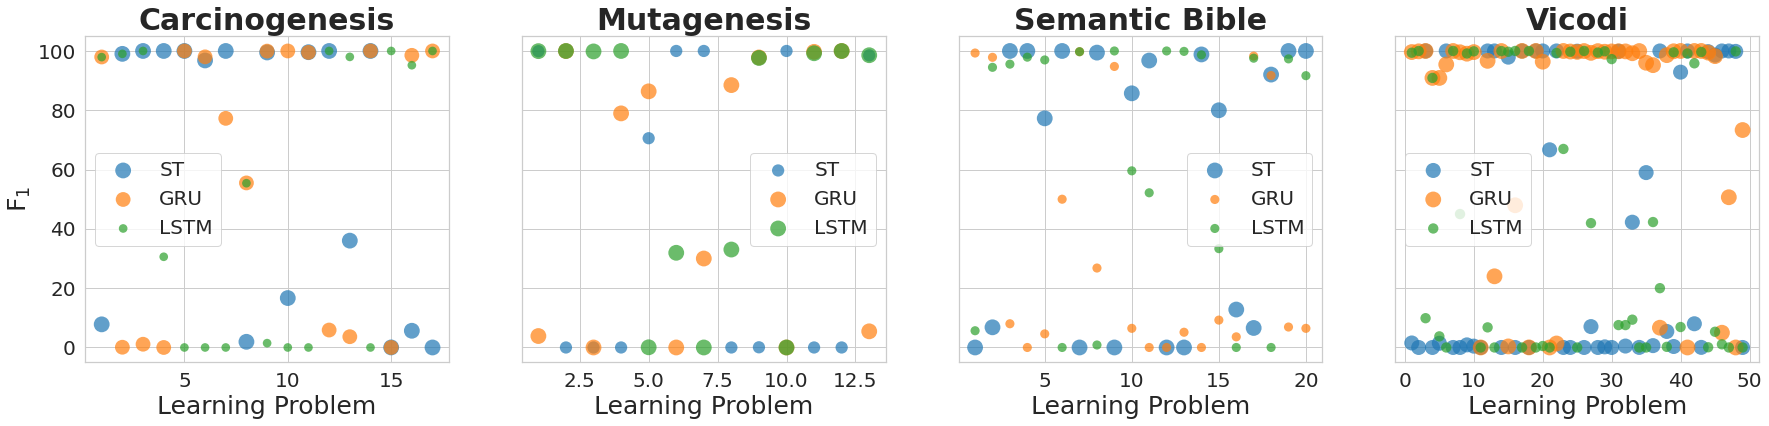

In [14]:
show_performance([[Res1, top1], [Res2, top2], [Res3, top3], [Res4, top4]])

## Accuracy curves

In [74]:
def plot_acc_curves(plot_data, names, mode='hard', emb_model='ConEx'):
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import seaborn as sns
    sns.set_theme(style="whitegrid")
    Markers = ['--', ':', '-']
    Colors = ['tab:blue', 'tab:orange', 'tab:green']
    
    fig, axs = plt.subplots(2, 2, figsize=(15,10), sharey=True, constrained_layout=True)
    legend = ('NCES$_{ST}$', 'NCES$_{GRU}$', 'NCES$_{LSTM}$')
    for ax, name, data in zip(axs.flat, names, plot_data):
        i = 0
        for crv in data[f'{mode} acc']:
            mk = Markers[i]
            c = Colors[i]
            ax.plot(crv, mk, markersize=3, linewidth=3, color=c)
            i += 1
        leg = ax.legend(legend, prop={'size': 20})
        for line in leg.get_lines():
            line.set_linewidth(4.0)
        ax.set_title(name, fontsize=25)
        ax.set_xlabel('Epochs', fontsize=20)
        ax.set_ylabel(mode.capitalize()+' Accuracy', fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=20)

    for ax in fig.get_axes():
        ax.label_outer()
    fig.savefig(f'accuracy-curves-all-KBs_{emb_model}_{mode}.pdf', bbox_inches='tight')
    fig.show()

In [75]:
plot_data = [{'soft acc': [], 'hard acc': []}, {'soft acc': [], 'hard acc': []}, {'soft acc': [], 'hard acc': []}, {'soft acc': [], 'hard acc': []}]
for i, kb in enumerate(['carcinogenesis', 'mutagenesis', 'semantic_bible', 'vicodi']):
    for model in ["SetTransformer", "GRU", "LSTM"]:
        with open(f'datasets/{kb}/Plot_data/ConEx_{model}_plot_data.json') as file:
            data = json.load(file)
            for mode in ['soft acc', 'hard acc']:
                plot_data[i][mode].append(data[mode])

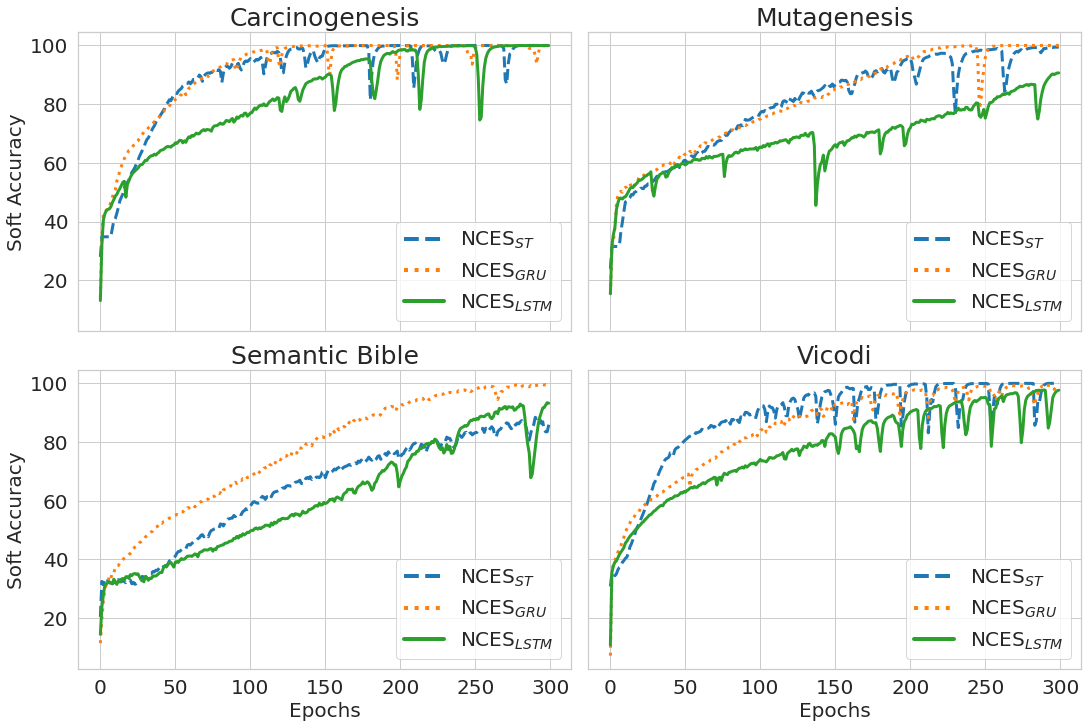

In [76]:
name1, name2, name3, name4 = 'Carcinogenesis', 'Mutagenesis', 'Semantic Bible', 'Vicodi'
plot_acc_curves(plot_data, [name1, name2, name3, name4], mode='soft')

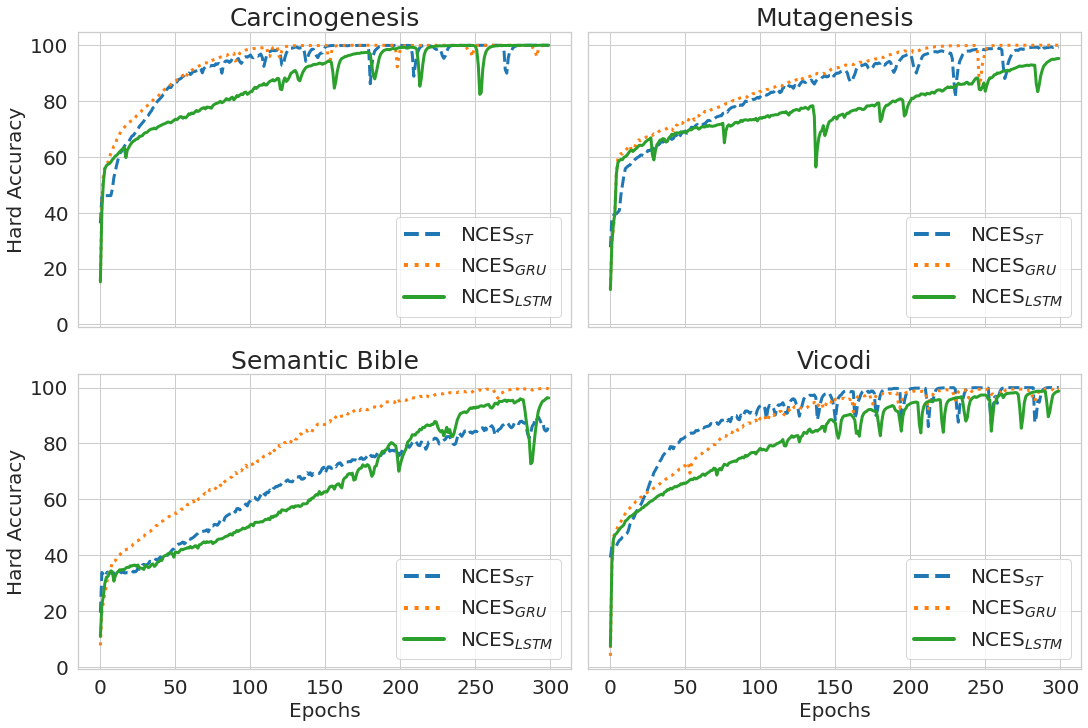

In [77]:
plot_acc_curves(plot_data, [name1, name2, name3, name4])

### Loss

In [78]:
emb_model = 'ConEx'

In [80]:
def plot_loss(loss_data, names):
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import seaborn as sns
    sns.set_theme(style="whitegrid")
    Markers = ['--', ':', '-']
    Colors = ['tab:blue', 'tab:orange', 'tab:green']
    
    fig, axs = plt.subplots(2, 2, figsize=(15,10), sharey=True, constrained_layout=True)
    legend = ('NCES$_{ST}$', 'NCES$_{GRU}$', 'NCES$_{LSTM}$')
    for ax, name, data in zip(axs.flat, names, loss_data):
        i = 0
        for crv in data['loss']:
            mk = Markers[i]
            c = Colors[i]
            ax.plot(crv, mk, markersize=3, linewidth=3, color=c)
            i += 1
        leg = ax.legend(legend, prop={'size': 20})
        for line in leg.get_lines():
            line.set_linewidth(4.0)
        ax.set_title(name, fontsize=25)
        ax.set_xlabel('Epochs', fontsize=20)
        ax.set_ylabel('Loss', fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=20)

    for ax in fig.get_axes():
        ax.label_outer()
    fig.savefig(f'{emb_model.lower()}-loss-all-KBs.pdf', bbox_inches='tight')
    fig.show()

In [81]:
## Loss
plot_data_loss = [{'loss': []}, {'loss': []}, {'loss': []}, {'loss': []}]
for i, kb in enumerate(['carcinogenesis', 'mutagenesis', 'semantic_bible', 'vicodi']):
    for model in ["SetTransformer", "GRU", "LSTM"]:
        with open(f'datasets/{kb}/Plot_data/ConEx_{model}_plot_data.json') as file:
            data_loss = json.load(file)
        plot_data_loss[i]['loss'].append(data_loss['loss'])

In [82]:
name1, name2, name3, name4 = 'Carcinogenesis', 'Mutagenesis', 'Semantic Bible', 'Vicodi'

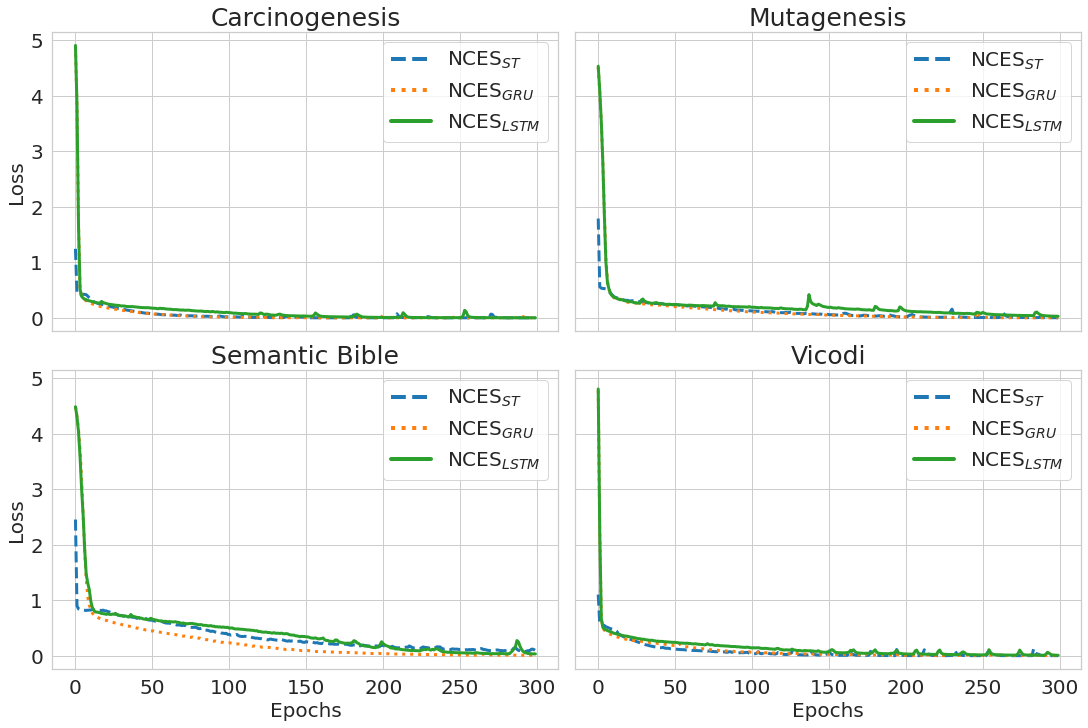

In [83]:
plot_loss(plot_data_loss, [name1, name2, name3, name4])